In [1]:
import folium
from folium import plugins
import pandas as pd
import numpy as np
import json
import geopandas as gp
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import geojson
import requests
import openpyxl

In [2]:
def coordToArray(geopdcoord):
    j = geopdcoord.replace("POINT (","") #remove palavra POINT (
    i = j.replace(")","").split(" ") # remove ultimo parenteses e splita o que sobrou resultando num array com as 2 coord
    ponto = Point(float(i[0]),float(i[1]))
    return ponto

In [16]:
#transforma coluna de geocode em um array com objetos do tipo point
geopoint = []
for ponto in df["Geocode Novo"]:
    geopoint.append(coordToArray(ponto))

In [176]:
###### VERIFICAR SE PONTOS ESTÂO DENTRO DOS POLÍGONOS######################################################
cidades = {'municípios':['Porto Alegre',
                         'Canoas',
                         'Viamão',
                         'Cachoeirinha',
                         'Gravataí',
                         'São Leopoldo',
                         'Novo Hamburgo',
                         'Alvorada',
                         'Sapucaia do Sul',
                         'Guaíba',
                         'Eldorado do Sul',
                         'Esteio'],
           'código':[4314902,
                     4304606,
                     4323002,
                     4303103,
                     4309209,
                     4318705,
                     4313409,
                     4300604,
                     4320008,
                     4309308,
                     4306767,
                     4307708]}     
       
dfCodCidades =pd.DataFrame(cidades)

In [266]:
#configuração para acessar ibge
headers = {
    'Content-Type': 'application/json;charset=UTF-8',
    'User-Agent': 'google-colab',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'Connection': 'keep-alive',
}
#loop para buscar shapes e armazenar em um DataFrame
arrayShapes = []
for cod in cidades['código']:
    #request via API ao site do IBGE
    shapes = requests.get("https://servicodados.ibge.gov.br/api/v2/malhas/"+str(cod)+"/?formato=application/vnd.geo+json&resolucao=5",
                              headers=headers)
    #atribui string json do shape para variável
    arrayShapes.append(Polygon(list(geojson.utils.coords(shapes.json()))))
    
dfCodCidades['ShapesIBGE'] = arrayShapes

TypeError: list indices must be integers or slices, not str

In [220]:
dfCodCidades.head(1)

,municípios,código,ShapesIBGE
0,Porto Alegre,4314902,"POLYGON ((-51.2336 -29.9377, -51.2206 -29.967,..."
1,Canoas,4304606,"POLYGON ((-51.123 -29.8663, -51.106 -29.9024, ..."
2,Viamão,4323002,"POLYGON ((-50.9493 -29.9665, -50.9144 -30.0028..."
3,Cachoeirinha,4303103,"POLYGON ((-51.1012 -29.8687, -51.1008 -29.8692..."
4,Gravataí,4309209,"POLYGON ((-50.8121 -29.7742, -50.8139 -29.7842..."
5,São Leopoldo,4318705,"POLYGON ((-51.0681 -29.8112, -51.1367 -29.799,..."
6,Novo Hamburgo,4313409,"POLYGON ((-51.1346 -29.638, -51.1298 -29.6385,..."
7,Alvorada,4300604,"POLYGON ((-50.9493 -29.9665, -50.9624 -29.9901..."
8,Sapucaia do Sul,4320008,"POLYGON ((-51.1896 -29.7785, -51.1657 -29.7991..."
9,Guaíba,4309308,"POLYGON ((-51.3025 -30.054, -51.3125 -30.0858,..."


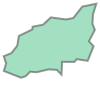

In [240]:
dfCodCidades.loc[dfCodCidades['municípios']=='Guaíba'].iloc[0][2] #teste

In [241]:
#loop  para verificar se coordenadas estão dentro de um polígono
ajuste = []
for x, y in zip(df['Município'], df['Geocode Novo']):
    #procura no df na a coluna onde o o municipio é igual x e retorna o valor da terceira coluna que tem os Shapes do IBGE
    poly = dfCodCidades.loc[dfCodCidades['municípios']==x].iloc[0][2]
    #verifica se o ponto y  está n dentro do shape da cidade e adicona o resulatado em um array
    ajuste.append(poly.contains(coordToArray(y)))
#ajuste

[True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True

In [242]:
df['Ajustar Coordenadas'] = ajuste
df.head(1)

,Órgão Registro,Ano Registro,Número Inteiro Ocorrência,Ano,Hora Minuto,Bairro Fato,Geocode,Placa,Marca,Tipo de Veículo,...,Ano Modelo,Município,Data Fato,Nome Rua,Nro,Tipo Fato,Fato,Geocode Novo,STATUS,Ajustar Coordenadas
0,100310,2005,8224,2005,21:00:00,NaN,NaN,LYG8322,FIAT/TEMPRA SX,AUTOMOVEL,...,1997,Porto Alegre,2005-07-27,JOAO TELLES,195,Consumado,ROUBO DE VEICULO,POINT (-51.2123532 -30.0310547),NaN,True
1,100305,2005,5397,2005,22:00:00,NaN,NaN,MBW2977,FORD FOCUS2.0L,AUTOMOVEL,...,2001,Porto Alegre,2005-08-30,LUDOLFO BOEHL,388,Consumado,ROUBO DE VEICULO,POINT (-51.2085 -30.08215),NaN,True
2,100317,2005,212,2005,13:00:00,NaN,NaN,IHE0192,M.BENZ/L 608 D,CAMINHAO,...,1981,Porto Alegre,2005-01-09,SETE DE ABRIL,55,Consumado,RECUPERACAO DE VEICULO,POINT (-51.20969 -30.01713),NaN,True
3,100313,2005,8381,2005,09:00:00,NaN,NaN,IAR1811,VW/SANTANA CG,AUTOMOVEL,...,1986,Porto Alegre,2005-10-04,FREDERICO CARLOS GOMES,309,Consumado,RECUPERACAO DE VEICULO,POINT (-51.20393 -30.11924),NaN,True
4,100450,2005,4652,2005,18:00:00,NaN,NaN,ILZ7970,VW/GOL 1.0,AUTOMOVEL,...,2005,Guaíba,2005-07-23,GETULIO VARGAS,1495,Consumado,ROUBO DE VEICULO,POINT (-52.2400793 -27.8893899),NaN,False


In [248]:
with pd.ExcelWriter('Georreferenciado.xlsx', mode='a', engine='openpyxl') as writer: 
    df.to_excel(writer, sheet_name='CoordAdjust')

In [327]:
#######TESTES#############################################################################################################

#mapa apenas com pontos validados dentro do polígono de cada cidade "true"
filtro=((df['Ajustar Coordenadas']==True)&
        (df['Tipo Fato']=='Consumado')&
        (df['Fato']!='RECUPERACAO DE VEICULO')&
        (df['Ano']>2018))
dfAdjust = df.loc[filtro]
dfAdjust.sort_values(by=['Data Fato'])
dfAdjust.head(3)
dfAdjust.shape

(14, 21)

In [328]:
geopoint2 = []
for ponto in dfAdjust["Geocode Novo"]:
    geopoint2.append(coordToArray(ponto))

In [308]:
#mistura pontos mais shapes
mapa4 = folium.Map(location=[-29.923361,-51.177189],zoom_start=10)

#cod cidades do IBGE
cidades = [4314902,4304606,4323002,4303103,4309209,4318705,4313409,4300604,4320008,4309308,4306767,4307708] 
for cod in cidades:
    cidades_jsons = requests.get("https://servicodados.ibge.gov.br/api/v2/malhas/"+str(cod)+"/?formato=application/vnd.geo+json&resolucao=5",
                               headers=headers)
    cidades_json = cidades_jsons.json()
    folium.GeoJson(cidades_json).add_to(mapa4)
    
conjunto=[]

for x in range(len(geopoint2)):  # CAPACIDADE DO FOLIUM É DE 63195 
#for x in range(50000):  # CAPACIDADE DO FOLIUM É DE 63195  
    conjunto.append([geopoint2[x].y,geopoint2[x].x])
    
    
mapa4.add_child(plugins.HeatMap(conjunto,name="Mapa de Calor", min_opacity=1, radius =10))  
mapa4

In [ ]:
#mistura pontos mais shapes
mapa3 = folium.Map(location=[-29.923361,-51.177189],zoom_start=7)
#API do IBGE para buscar malhas https://servicodados.ibge.gov.br/api/docs/malhas?versao=2
headers = {
    'Content-Type': 'application/json;charset=UTF-8',
    'User-Agent': 'google-colab',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'Connection': 'keep-alive',
}
#cod cidades do IBGE
cidades = [4314902,4304606,4323002,4303103,4309209,4318705,4313409,4300604,4320008,4309308,4306767,4307708] 

for cod in cidades:
    cidades_jsons = requests.get("https://servicodados.ibge.gov.br/api/v2/malhas/"+str(cod)+"/?formato=application/vnd.geo+json&resolucao=5",
                               headers=headers)
    cidades_json = cidades_jsons.json()
    #cidades_json2 = cidades_json
    folium.GeoJson(cidades_json).add_to(mapa3)
    
conjunto=[]
   
for x in range(50000):  # CAPACIDADE DO FOLIUM É DE 63195  
    conjunto.append([geopoint[x].y,geopoint[x].x])
    
    
mapa3.add_child(plugins.HeatMap(conjunto))  
mapa3

In [ ]:
#mapa
mapa1 = folium.Map(location=[-29.923361,-51.177189],zoom_start=10)

cidades = [4314902,4304606,4323002,4303103,4309209,4318705,4313409,4300604,4320008,4309308,4306767,4307708]
headers = {
    'Content-Type': 'application/json;charset=UTF-8',
    'User-Agent': 'google-colab',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'Connection': 'keep-alive',
}

for cod in cidades:
    cidades_jsons = requests.get("https://servicodados.ibge.gov.br/api/v2/malhas/"+str(cod)+"/?formato=application/vnd.geo+json&resolucao=5",
                               headers=headers)
    cidades_json = cidades_jsons.json()
    #cidades_json2 = cidades_json
    folium.GeoJson(cidades_json).add_to(mapa1)
mapa1